In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [384]:
titanic_data = pd.read_csv("Titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [385]:
titanic_data.drop(columns=['Cabin', 'Name', 'Embarked', 'Ticket', 'PassengerId'], inplace=True)


In [386]:
#fillna
titanic_data['Age'] = titanic_data.groupby('Sex')['Age']\
                                 .transform(lambda x: x.fillna(x.mean()))

titanic_data['SibSp'] = titanic_data['SibSp'].fillna(titanic_data['SibSp'].mode())
titanic_data['Parch'] = titanic_data['Parch'].fillna(titanic_data['Parch'].mode())
titanic_data['Fare'] = titanic_data['Fare'].fillna(titanic_data['Fare'].mean())
titanic_data['Pclass'] = titanic_data['Pclass'].fillna(titanic_data['Pclass'].mode())
titanic_data['Sex'] = titanic_data['Sex'].fillna(titanic_data['Sex'].mode())

In [387]:
#create dummy varibles
titanic_data['Male'] = pd.get_dummies(titanic_data['Sex']).drop('female',axis = 1)
titanic_data.drop('Sex', axis = 1, inplace=True)
Pclass = pd.DataFrame(pd.get_dummies(titanic_data['Pclass']))
Pclass.columns = ['Pclass_' + str(i) for i in range(1,4)]
titanic_data = pd.concat([titanic_data, Pclass],axis = 1)
titanic_data.drop('Pclass', axis = 1, inplace = True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1


In [388]:
#standarize Age, Fare, sibsp, parch
range_age = titanic_data['Age'].max() - titanic_data['Age'].min()
titanic_data['Age'] = (titanic_data['Age'] - titanic_data['Age'].min())/range_age

range_fare = titanic_data['Fare'].max() - titanic_data['Fare'].min()
titanic_data['Fare'] = (titanic_data['Fare'] - titanic_data['Fare'].min())/range_fare

range_SibSp = titanic_data['SibSp'].max() - titanic_data['SibSp'].min()
titanic_data['SibSp'] = (titanic_data['SibSp'] - titanic_data['SibSp'].min())/range_SibSp

range_Parch = titanic_data['Parch'].max() - titanic_data['Parch'].min()
titanic_data['Parch'] = (titanic_data['Parch'] - titanic_data['Parch'].min())/range_Parch

titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,Male,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,0.125,0.0,0.014151,1,0,0,1
1,1,0.472229,0.125,0.0,0.139136,0,1,0,0
2,1,0.321438,0.000,0.0,0.015469,0,0,0,1
3,1,0.434531,0.125,0.0,0.103644,0,1,0,0
4,0,0.434531,0.000,0.0,0.015713,1,0,0,1


<AxesSubplot:xlabel='Male', ylabel='count'>

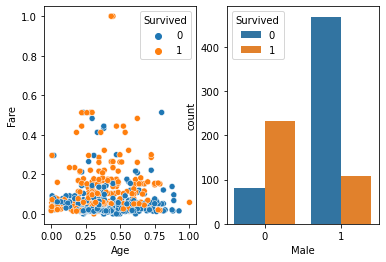

In [389]:
#explore the dataset
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.scatterplot(ax = ax1, x='Age', y = 'Fare', hue = 'Survived', data=titanic_data)
sns.countplot(ax = ax2, x='Male', hue = 'Survived', data=titanic_data)

In [390]:
#get x and y
X = titanic_data.drop('Survived', axis = 1).values
y = titanic_data['Survived'].values

In [391]:
#split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [392]:
#train the model and use confusion matrix to see the result
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
cm = confusion_matrix(y_test, prediction)

<AxesSubplot:>

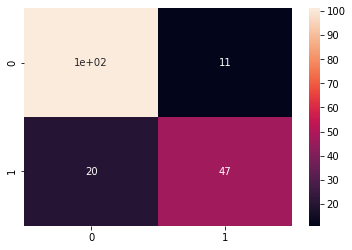

In [393]:
sns.heatmap(cm, annot=True)

In [394]:
#classification report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.81      0.70      0.75        67

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

